# Research Articles

In [1]:
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from textblob import TextBlob

In [2]:
# Unzipping and loading the dataset
zip_file_path = 'Research Articles.zip'
dataset_path = './Research_Articles'

if not os.path.exists(dataset_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print(f"Unzipped the dataset to: {dataset_path}")
else:
    print(f"Dataset already extracted at: {dataset_path}")

# Load the CSV file
file_path = os.path.join(dataset_path, 'data.csv')
df = pd.read_csv(file_path)
print(f"Dataset loaded with shape: {df.shape}")

# Display the first few rows to inspect the data
print(df.head())


Unzipped the dataset to: ./Research_Articles
Dataset loaded with shape: (29500, 14)
                                        sha source_x  \
0  c630ebcdf30652f0422c3ec12a00b50241dc9bd9      CZI   
1  53eccda7977a31e3d0f565c884da036b1e85438e      CZI   
2  210a892deb1c61577f6fba58505fd65356ce6636      CZI   
3  e3b40cc8e0e137c416b4a2273a4dca94ae8178cc      CZI   
4  92c2c9839304b4f2bc1276d41b1aa885d8b364fd      CZI   

                                               title  \
0  Angiotensin-converting enzyme 2 (ACE2) as a SA...   
1  Comparative genetic analysis of the novel coro...   
2  Incubation Period and Other Epidemiological Ch...   
3  Characteristics of and Public Health Responses...   
4       Imaging changes in severe COVID-19 pneumonia   

                          doi pmcid   pubmed_id   license  \
0  10.1007/s00134-020-05985-9   NaN  32125455.0  cc-by-nc   
1   10.1038/s41421-020-0147-1   NaN         NaN     cc-by   
2          10.3390/jcm9020538   NaN         NaN     cc-by  

In [3]:
#  Inspect and Clean the Data

# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Fill or drop missing values as needed
df['abstract'].fillna("No abstract available", inplace=True)
df.dropna(subset=['title'], inplace=True)

# Drop unnecessary columns for initial analysis
columns_to_drop = ['sha', 'pmcid', 'pubmed_id', 'Microsoft Academic Paper ID', 'WHO #Covidence']
df.drop(columns=columns_to_drop, inplace=True)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Convert 'publish_time' to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
print("\nDataset after cleaning:")
print(df.info())



Missing Values Summary:
sha                            12080
source_x                           0
title                              9
doi                             3143
pmcid                           2163
pubmed_id                      12770
license                        11808
abstract                        2591
publish_time                   10896
authors                          597
journal                        11709
Microsoft Academic Paper ID    28366
WHO #Covidence                 28264
has_full_text                  12080
dtype: int64

Data Types:
source_x         object
title            object
doi              object
license          object
abstract         object
publish_time     object
authors          object
journal          object
has_full_text    object
dtype: object

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 29491 entries, 0 to 29499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --

C:\Users\milto\AppData\Local\Temp\ipykernel_21460\3234507016.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['abstract'].fillna("No abstract available", inplace=True)


In [4]:
# Handle Missing Values in Key Columns

# Fill missing publish_time with a placeholder
df['publish_time'].fillna(pd.Timestamp("1900-01-01"), inplace=True)

# Fill missing journal values with "Unknown Journal"
df['journal'].fillna("Unknown Journal", inplace=True)

C:\Users\milto\AppData\Local\Temp\ipykernel_21460\317004978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['publish_time'].fillna(pd.Timestamp("1900-01-01"), inplace=True)
C:\Users\milto\AppData\Local\Temp\ipykernel_21460\317004978.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

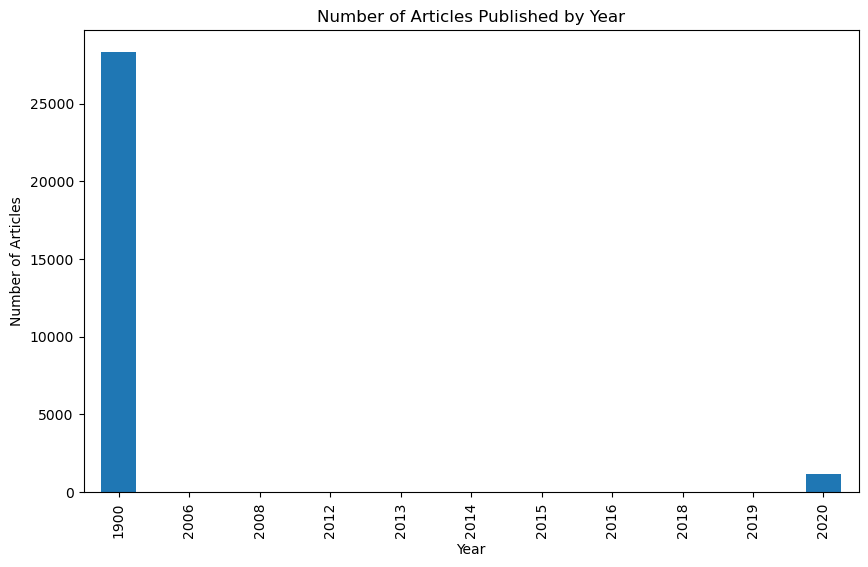

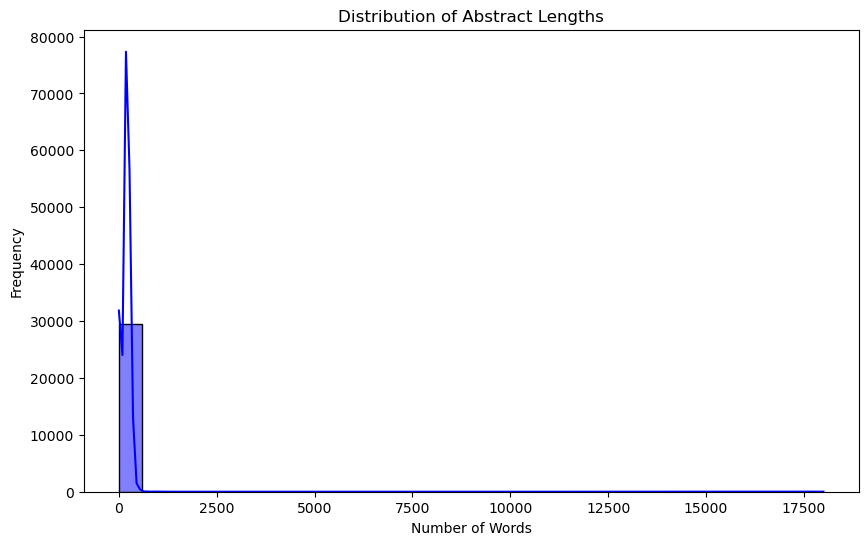

C:\Users\milto\AppData\Local\Temp\ipykernel_21460\2814962965.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')


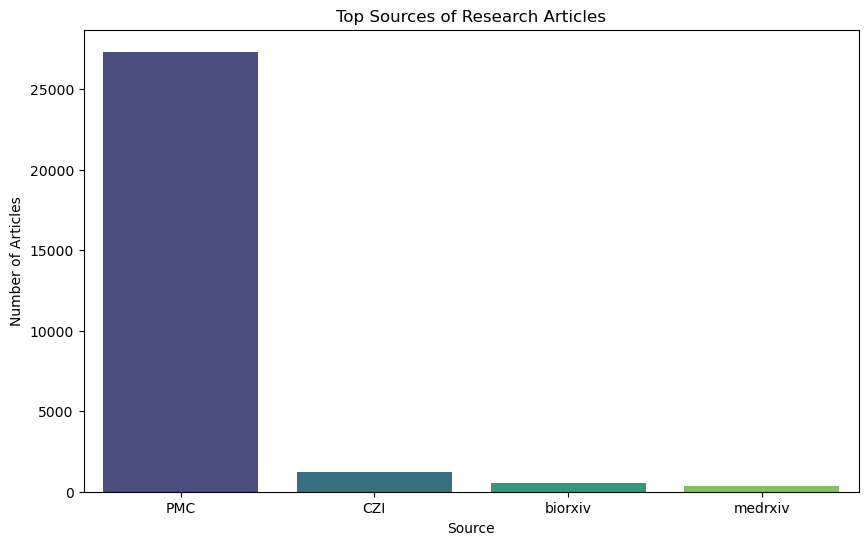

C:\Users\milto\AppData\Local\Temp\ipykernel_21460\2814962965.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.index, y=top_journals.values, palette='viridis')


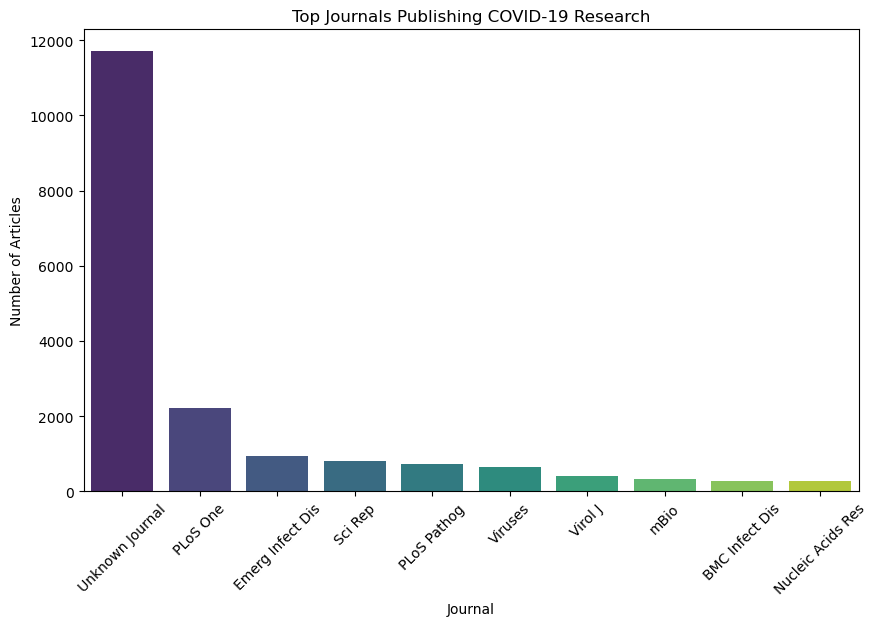

In [5]:
# Exploratory Data Analysis (EDA)

# Distribution of publication dates
plt.figure(figsize=(10, 6))
df['publish_time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

# Check Abstract Length Distribution
df['abstract_length'] = df['abstract'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['abstract_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Top sources
top_sources = df['source_x'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.title('Top Sources of Research Articles')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_journals.index, y=top_journals.values, palette='viridis')
plt.title('Top Journals Publishing COVID-19 Research')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [6]:
# NLP Analysis

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_abstract'])

# Latent Dirichlet Allocation (LDA)

from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

# Display top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print(", ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 1:
epidemic, transmission, data, disease, cases, outbreak, public, health, available, abstract
Topic 2:
pneumonia, virus, infection, infections, influenza, samples, clinical, children, respiratory, patients
Topic 3:
leader, rnas, rdrp, synthesis, subgenomic, frameshifting, genome, di, sequence, rna
Topic 4:
immune, expression, proteins, mice, cell, viral, infection, virus, protein, cells
Topic 5:
influenza, strains, new, vaccine, genome, species, human, viral, viruses, virus


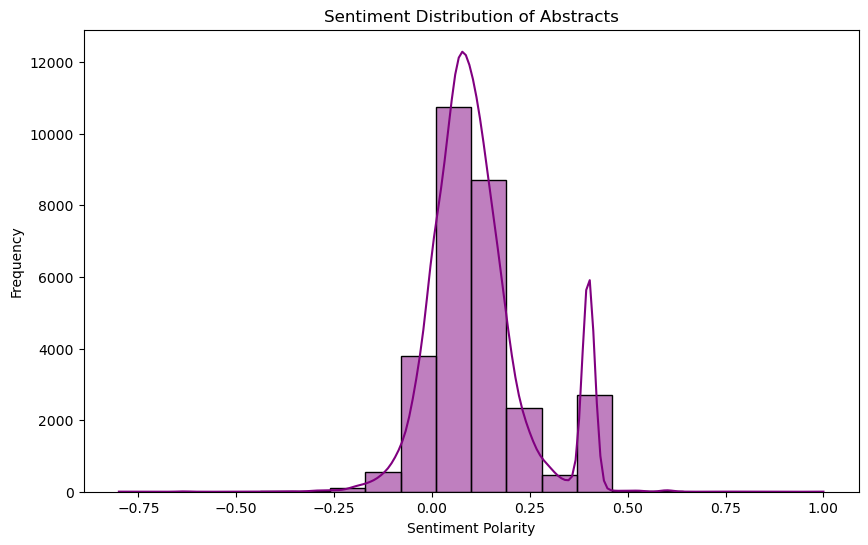

In [8]:
# Sentiment Analysis

def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_abstract'].apply(analyze_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Distribution of Abstracts')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Save cleaned dataset
cleaned_file_path = os.path.join(dataset_path, 'cleaned_data.csv')
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ./Research_Articles\cleaned_data.csv
